# 1. Connect to google drive and load neccessary libraries

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Retrieve Converted Data (from .rds to .h5ad)

[Conversions: h5Seurat and AnnData](https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html) with R (file: convert_rds_to_h5Seurat.R)

In [4]:
adata = pd.read_csv('/content/gdrive/MyDrive/Idorsia Capstone Project/data/count_celltype_cancer_data.zip')

In [ ]:
# drop cancer type columns ince it will not be needed in supervised ML
df_input = adata.drop(columns=['cancer_type'])

# 3. Class Imbalance

In [ ]:
value_count_cell_state = adata['cell_state'].value_counts()
type(value_count_cell_state)

pandas.core.series.Series

In [ ]:
celltype_count = pd.DataFrame({'count': value_count_cell_state})
celltype_count['percentage'] = celltype_count['count'].apply(lambda row: row/sum(celltype_count['count'])*100)
celltype_count

,count,percentage
CD4 naive T-cell,11552,10.644650
CD4 regulatory T-cell (unspecified),11249,10.365449
CD8 effector memory T-cell,9667,8.907707
CD4 helper T-cell (unspecified),8010,7.380856
CD8 memory T-cell (unspecified),7183,6.618812
CD4 follicular helper T-cell,6749,6.218901
CD8 T-cell (unspecified),5490,5.058789
CD8 resident memory T-cell,5466,5.036674
B-cell (unspecified),5134,4.730751
CD8 activated T-cell (unspecified),4903,4.517895


# 4. Add new labels (broader cell types)

In [ ]:
value_count_cell_state

CD4 naive T-cell                                11552
CD4 regulatory T-cell (unspecified)             11249
CD8 effector memory T-cell                       9667
CD4 helper T-cell (unspecified)                  8010
CD8 memory T-cell (unspecified)                  7183
CD4 follicular helper T-cell                     6749
CD8 T-cell (unspecified)                         5490
CD8 resident memory T-cell                       5466
B-cell (unspecified)                             5134
CD8 activated T-cell (unspecified)               4903
macrophage                                       4523
plasma cell                                      3073
CD8 exhausted T-cell (unspecified)               3047
natural killer cell                              2593
CD8 exhausted resident memory T-cell             1932
NK T-cell (unspecified)                          1729
Th17 T-cell                                      1684
M2 macrophage                                    1290
CD8 cytotoxic T-cell (unspec

- T-cell
- B-cell
- macrophage
- plasma cell
- killer cell
- monocyte
- lymphocyte
- granulocyte
- dendritic cell
- mast cell
- myeloid cell

In [ ]:
category_dict = {
   'CD4 naive T-cell': 'T-cell',
   'CD4 regulatory T-cell (unspecified)': 'T-cell',
   'CD8 effector memory T-cell': 'T-cell',
   'CD4 helper T-cell (unspecified)': 'T-cell',
   'CD8 memory T-cell (unspecified)': 'T-cell',
   'CD4 follicular helper T-cell': 'T-cell',
   'CD8 T-cell (unspecified)': 'T-cell',
   'CD8 resident memory T-cell': 'T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'T-cell',
   'NK T-cell (unspecified)': 'T-cell',
   'Th17 T-cell': 'T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'T-cell'
}

In [ ]:
df_input['cell_type'] = df_input['cell_state'].apply(lambda cell: category_dict[cell])
df_input['cell_type']

0             T-cell
1             T-cell
2             T-cell
3             T-cell
4             T-cell
             ...    
108519    macrophage
108520        T-cell
108521        B-cell
108522    macrophage
108523        B-cell
Name: cell_type, Length: 108524, dtype: object

In [ ]:
value_count_cell_type = df_input['cell_type'].value_counts()
value_count_cell_type

T-cell            83066
B-cell             7084
macrophage         6126
plasma cell        3073
killer cell        2593
monocyte           2089
dendritic cell     1995
lymphocyte          884
granulocyte         800
mast cell           505
leukocyte           225
myeloid cell         84
Name: cell_type, dtype: int64

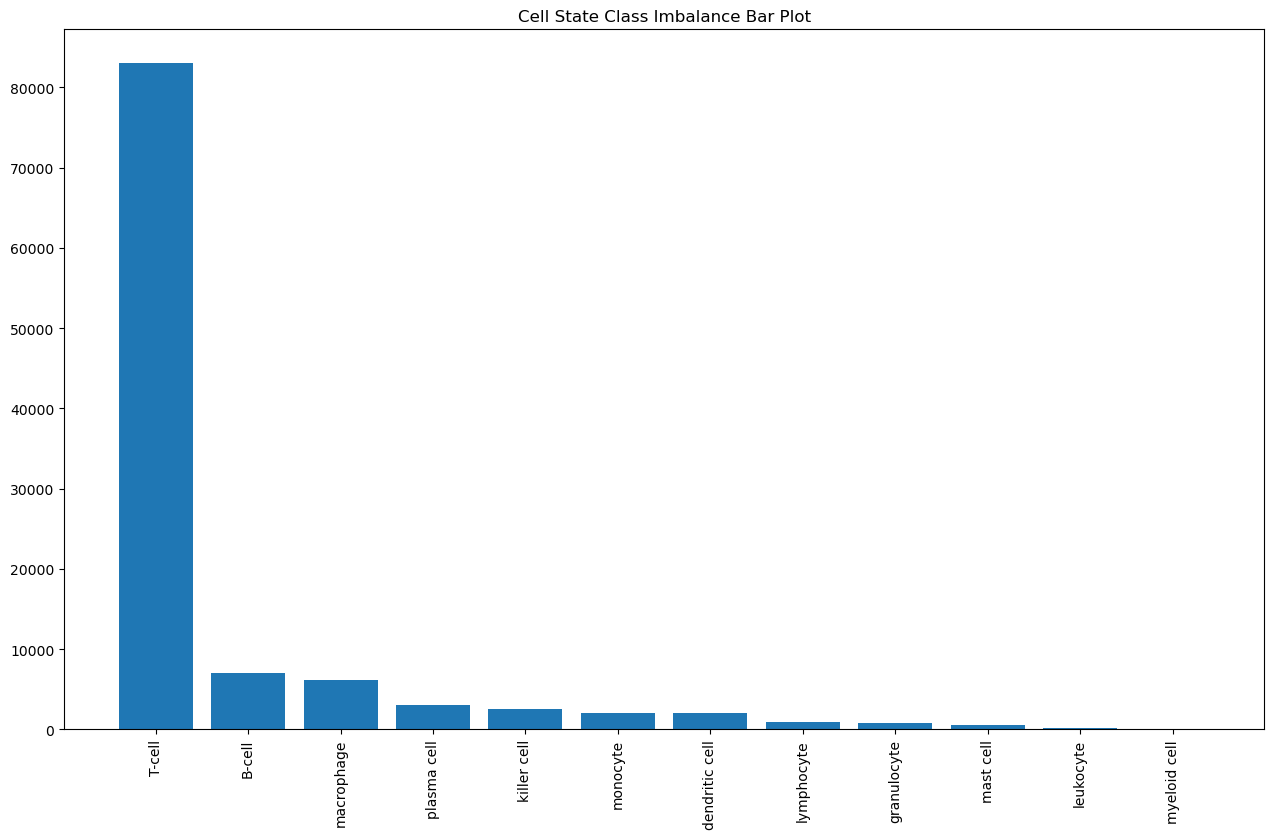

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(value_count_cell_type.index,value_count_cell_type)
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

In [ ]:
df_input.head()

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,...,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
0,GSM3148575_AAACCTGAGCAGACTG,-0.111114,1.568355,-0.472143,-0.423873,-0.101434,-0.402733,-0.337112,-0.246458,-0.365898,...,0.763551,0.091451,0.275325,0.218218,1.032745,0.056507,CD8 exhausted T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted T-cell (unspecified)
1,GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,...,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
2,GSM3148575_AAACCTGAGTGTACCT,-0.089754,-0.426394,-0.315355,-0.266967,-0.116696,-0.385388,-0.299696,-0.257290,-0.327043,...,-0.856581,-0.838144,-0.105070,-0.694922,0.183837,-0.101306,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
3,GSM3148575_AAACCTGAGTGTACTC,-0.125882,1.693439,-0.466246,-0.463509,-0.090135,-0.383227,3.065477,-0.240090,-0.350679,...,0.720020,-0.983937,1.177727,-1.270444,1.191090,-0.057102,CD8 exhausted T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted T-cell (unspecified)
4,GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,...,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell,CD4 naive T-cell


In [ ]:
value_count = df_input['cell_type'].value_counts()

In [ ]:
count = pd.DataFrame({'count': value_count})
count['percentage'] = count['count'].apply(lambda row: row/sum(count['count'])*100)
count

,count,percentage
T-cell,83066,76.541594
B-cell,7084,6.527588
macrophage,6126,5.644834
plasma cell,3073,2.831632
killer cell,2593,2.389333
monocyte,2089,1.924920
dendritic cell,1995,1.838303
lymphocyte,884,0.814566
granulocyte,800,0.737164
mast cell,505,0.465335


# 5. random sample 30% of the final result data (percentage of cell types stay the same --> unbalanced) 
This will be the test data and used to make clusters (unsupervised ML) and to test the supervised models

In [ ]:
test_sample = df_input.sample(frac=0.3, random_state=12) #randomly subsample 30%
test_sample

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,...,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
50136,GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,...,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
71770,ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,...,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
81288,GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,...,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
32679,GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,...,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876,CD8 memory T-cell (unspecified),T-cell,CD8 T-cell,CD8 memory T-cell (unspecified)
80940,GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,...,0.744759,0.571193,-1.357367,1.229524,-0.346317,0.446866,CD8 effector memory T-cell,T-cell,CD8 T-cell,CD8 effector memory T-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31766,GSM3511757_GAACGGAGTAAAGGAG,-0.130515,-0.874680,1.681733,1.355516,-0.098319,-0.433062,-0.343592,-0.206542,-0.415096,...,0.017657,0.210379,1.333519,-1.041165,0.607557,1.065918,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
60981,ERS2657940_CACCAGGGTTCAGTAC,-0.118220,-0.755965,-0.638796,-0.580973,-0.102962,-0.432203,-0.337465,-0.223925,-0.412960,...,0.290475,0.155287,0.808164,0.878716,-0.162806,0.995828,GC-dependent memory B-cell,B-cell,B-cell,B-cell
43591,GSM3721455_TCTCTAACAGCCAATT,-0.099814,-0.566724,1.784935,-0.399040,-0.112428,3.398727,-0.312541,-0.242223,2.424055,...,0.632651,0.839555,-0.345422,-3.366794,1.443586,0.276186,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
49581,GSM3721462_TATGCCCTCGAACGGA,-0.140376,0.845377,-0.940970,-0.782930,-0.078261,-0.506416,3.209857,-0.238823,-0.539210,...,0.593094,1.008726,0.524155,0.684394,0.922326,0.331217,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)


In [ ]:
value_count_sample = test_sample['cell_type'].value_counts()
count_sample = pd.DataFrame({'count': value_count_sample})
count_sample['percentage'] = count_sample['count'].apply(lambda row: row/sum(count_sample['count'])*100)
count_sample

,count,percentage
T-cell,24926,76.561108
B-cell,2158,6.628375
macrophage,1823,5.599410
plasma cell,885,2.718309
killer cell,756,2.322081
monocyte,655,2.011856
dendritic cell,597,1.833707
lymphocyte,271,0.832386
granulocyte,243,0.746383
mast cell,147,0.451516


In [ ]:
test_sample.to_csv('subset_30.csv', index=False)

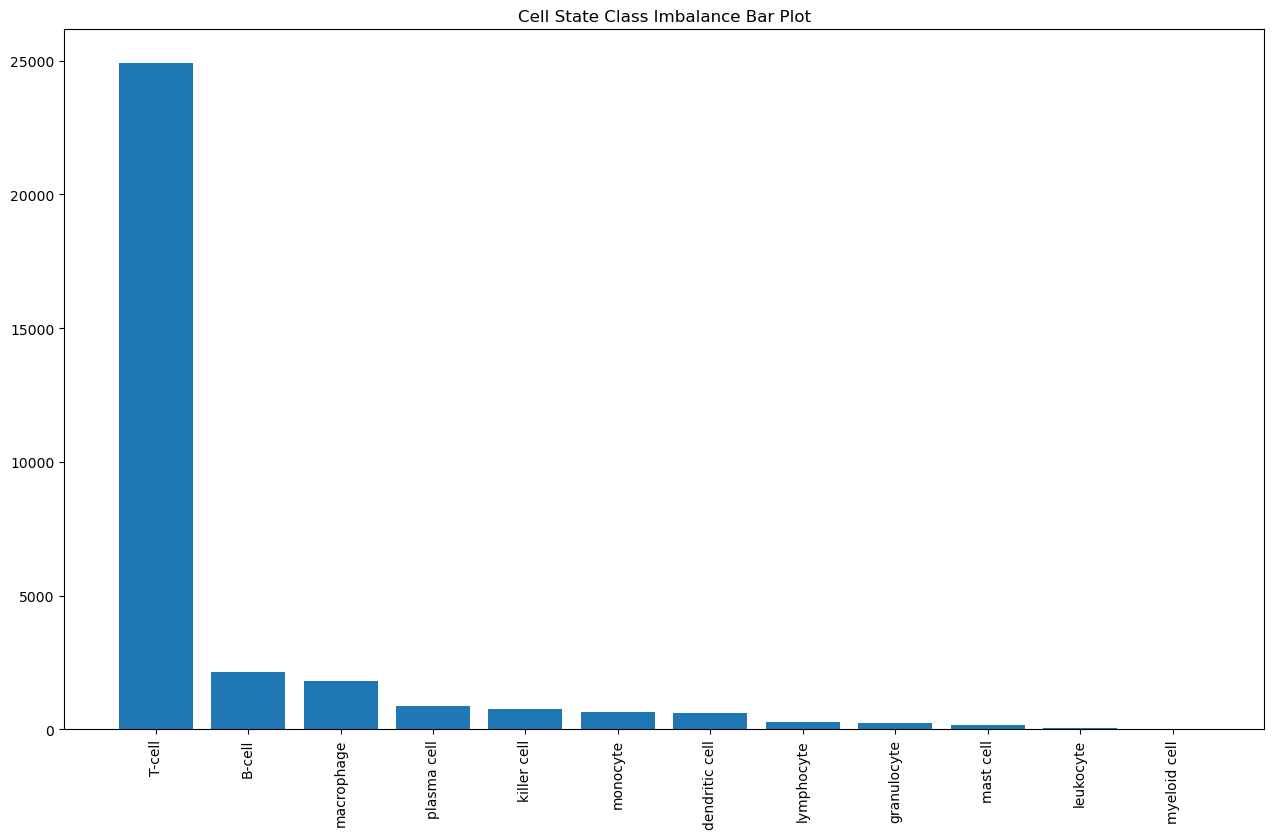

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(count_sample.index,count_sample['count'])
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

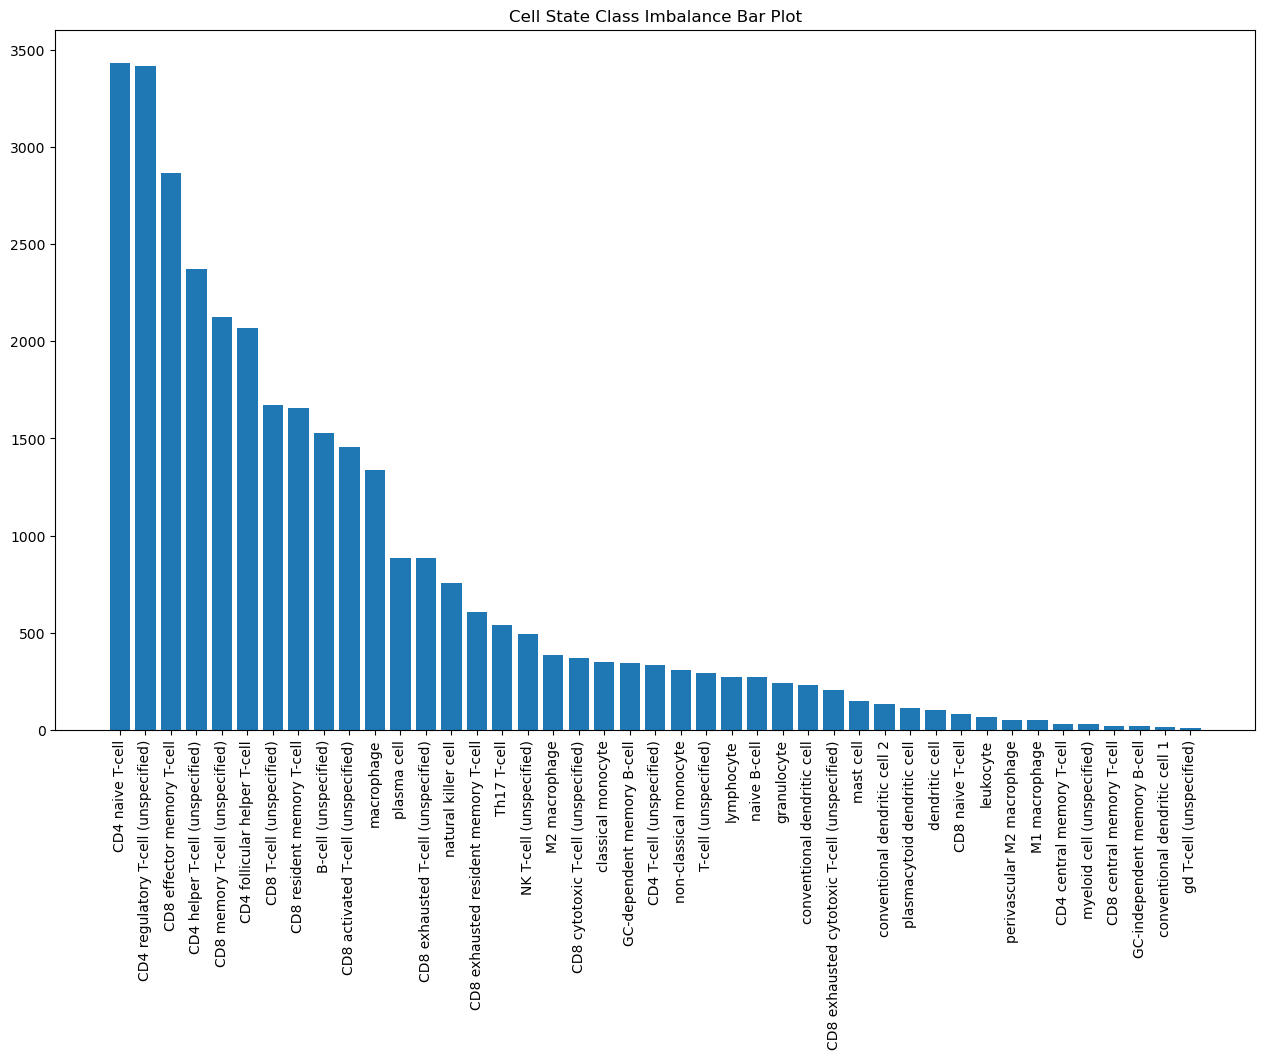

In [ ]:
count_all = test_sample['cell_state'].value_counts()
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(count_all.index,count_all)
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

# 6. creat new df with test data excluded

In [ ]:
df_without_test = pd.concat([df_input,test_sample]).drop_duplicates(keep=False)

In [ ]:
# check that the right amount of rows was excluded
print('length original df: ' + str(len(df_input)))
print('length test sample df: ' + str(len(test_sample)))
print('length df without test data: ' + str(len(df_without_test)))
print('length test sample + df without test: ' + str(len(test_sample)+len(df_without_test)))

length original df: 108524
length test sample df: 32557
length df without test data: 75967
length test sample + df without test: 108524


# 7. unbalanced 10% train data
This will be the train data for the unbalanced ML models. It will be split into train and test again when training the ML model.

In [ ]:
train_sample = df_without_test.sample(frac=0.1, random_state=12)
train_sample

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,...,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
105140,GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,...,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage,macrophage,macrophage
71334,ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,...,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell,CD8 T-cell,CD8 effector memory T-cell
76464,GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,...,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
80005,GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,...,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell,CD8 T-cell,CD8 resident memory T-cell
80735,GSM4143657_GATCGATGTGTAACGG,-0.109905,-0.584470,-0.429646,-0.404012,-0.107612,1.351830,-0.311605,-0.234214,-0.309260,...,-0.073536,0.540572,-0.349338,1.037495,-0.207295,0.933198,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52701,GSM3044523_CGAGAAGCATTTGCTT,-0.124892,-0.844326,-0.668590,-0.653158,-0.100020,-0.436712,-0.341531,-0.211444,2.343414,...,-0.060938,0.148721,0.959081,0.860155,0.382672,-0.123336,CD8 resident memory T-cell,T-cell,CD8 T-cell,CD8 resident memory T-cell
45763,GSM3721458_TCTGGAAAGGAGTAGA,-0.079367,1.237966,-0.385435,1.897541,-0.129307,-0.419086,-0.278625,-0.244662,2.649822,...,0.025221,-0.014336,-0.111636,0.235713,0.721173,0.917552,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
24815,GSM3148579_TCTATTGCACCGAATT,-0.124386,2.204428,-0.556926,-0.548314,-0.097153,-0.403604,-0.340518,-0.223472,-0.381149,...,1.218435,-1.223732,-0.034833,-0.820779,0.224485,1.315261,lymphocyte,lymphocyte,lymphocyte,lymphocyte
40079,GSM3721454_AGGTCCGCACATTCGA,-0.110365,-0.759082,-0.634001,-0.586114,-0.108762,-0.450430,-0.329596,-0.223159,2.821080,...,1.243290,1.304841,-0.696727,-2.742520,1.064332,1.163899,CD8 memory T-cell (unspecified),T-cell,CD8 T-cell,CD8 memory T-cell (unspecified)


In [ ]:
value_count_sample = train_sample['cell_type'].value_counts()
count_sample = pd.DataFrame({'count': value_count_sample})
count_sample['percentage'] = count_sample['count'].apply(lambda row: row/sum(count_sample['count'])*100)
count_sample

,count,percentage
T-cell,5747,75.648282
B-cell,533,7.015927
macrophage,459,6.041859
plasma cell,226,2.974858
killer cell,186,2.448335
monocyte,141,1.855996
dendritic cell,120,1.579571
granulocyte,64,0.842438
lymphocyte,62,0.816112
mast cell,42,0.552850


In [ ]:
train_sample.to_csv('subset_10.csv', index=False)

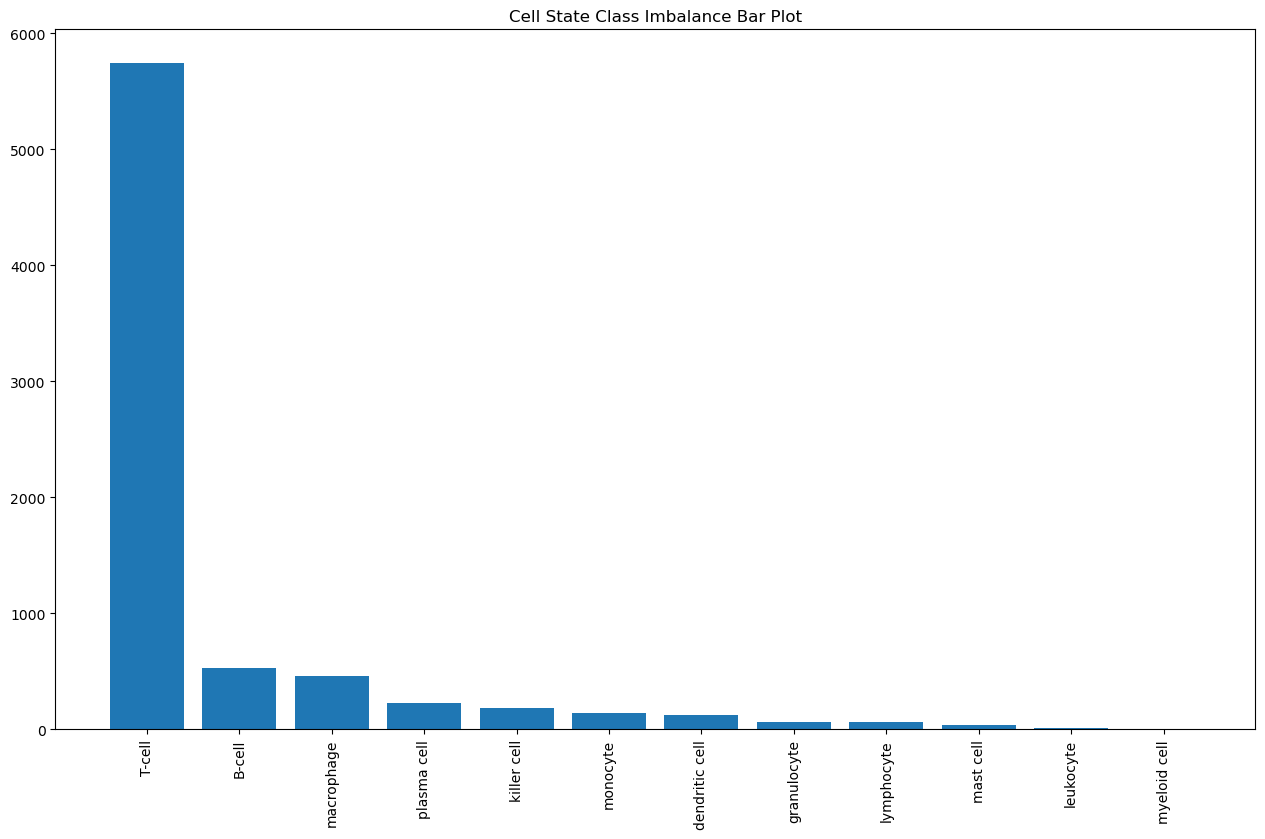

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(count_sample.index,count_sample['count'])
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

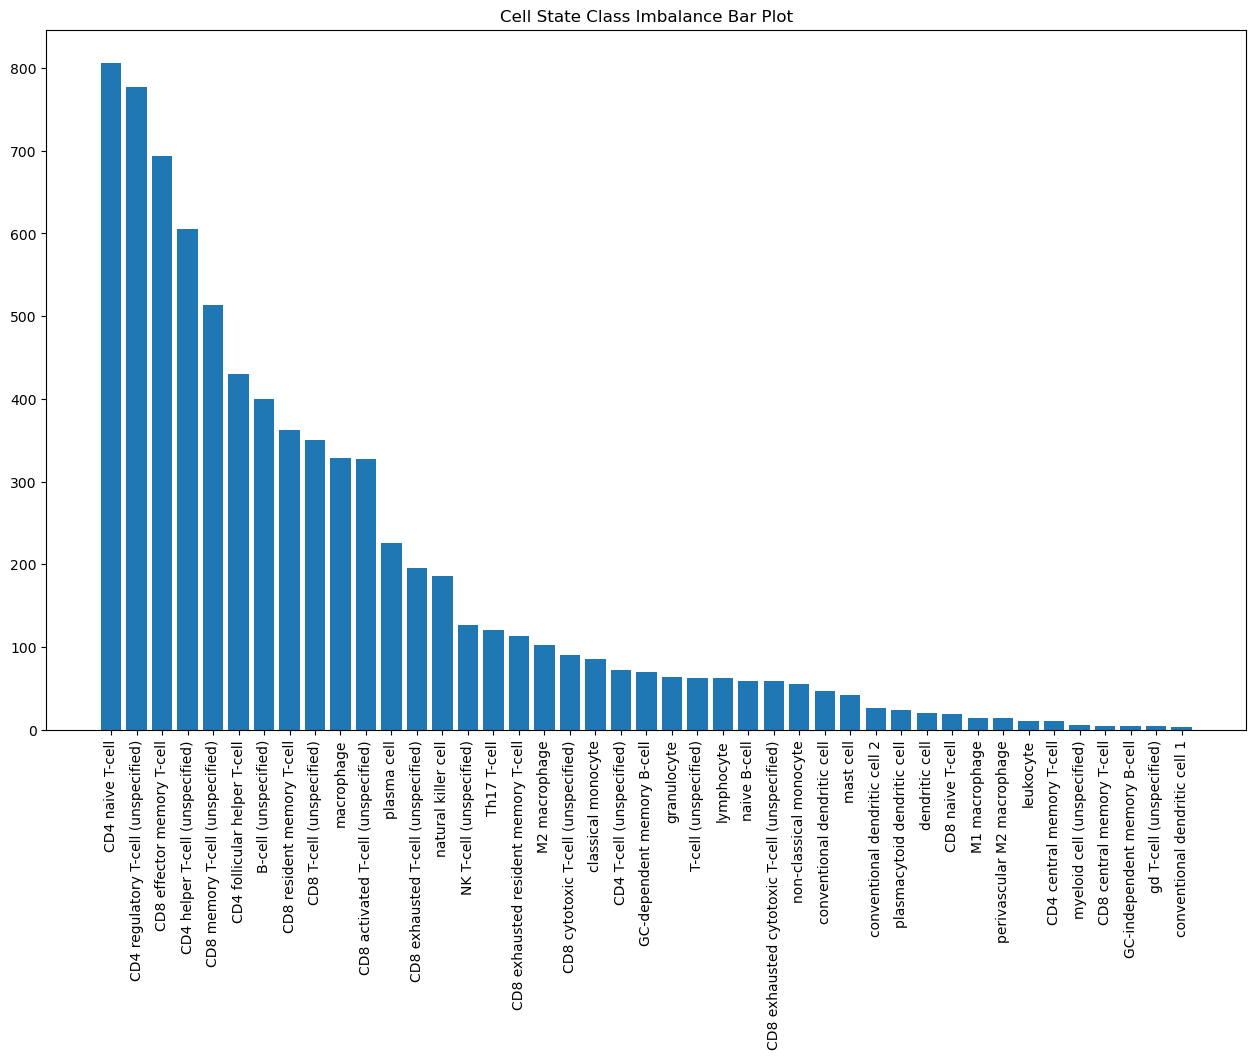

In [ ]:
count_all = train_sample['cell_state'].value_counts()
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(count_all.index,count_all)
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

# 8. balanced 10% train data
This will be the train data for the balanced supervised ML models. It will be split into train and test again when training the ML model.

In [ ]:
df_input.head()

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,...,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
0,GSM3148575_AAACCTGAGCAGACTG,-0.111114,1.568355,-0.472143,-0.423873,-0.101434,-0.402733,-0.337112,-0.246458,-0.365898,...,0.763551,0.091451,0.275325,0.218218,1.032745,0.056507,CD8 exhausted T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted T-cell (unspecified)
1,GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,...,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
2,GSM3148575_AAACCTGAGTGTACCT,-0.089754,-0.426394,-0.315355,-0.266967,-0.116696,-0.385388,-0.299696,-0.257290,-0.327043,...,-0.856581,-0.838144,-0.105070,-0.694922,0.183837,-0.101306,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
3,GSM3148575_AAACCTGAGTGTACTC,-0.125882,1.693439,-0.466246,-0.463509,-0.090135,-0.383227,3.065477,-0.240090,-0.350679,...,0.720020,-0.983937,1.177727,-1.270444,1.191090,-0.057102,CD8 exhausted T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted T-cell (unspecified)
4,GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,...,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell,CD4 naive T-cell


## based on cell_state

In [ ]:
celltype_count = pd.DataFrame({'count': df_without_test['cell_state'].value_counts()})
celltype_count['percentage'] = celltype_count['count'].apply(lambda row: row/sum(celltype_count['count'])*100)
celltype_count

,count,percentage
CD4 naive T-cell,8119,10.687535
CD4 regulatory T-cell (unspecified),7829,10.305791
CD8 effector memory T-cell,6802,8.953888
CD4 helper T-cell (unspecified),5639,7.422960
CD8 memory T-cell (unspecified),5059,6.659471
CD4 follicular helper T-cell,4682,6.163202
CD8 T-cell (unspecified),3820,5.028499
CD8 resident memory T-cell,3809,5.014019
B-cell (unspecified),3606,4.746798
CD8 activated T-cell (unspecified),3445,4.534864


In [ ]:
df_without_test['count_index'] = range(0, len(df_without_test))

cut_off = 250
needed_index = []
for i in range(0, len(celltype_count)):
  if celltype_count['count'][i] > cut_off:
    needed_index.append(list(df_without_test[df_without_test['cell_state'] == celltype_count.index[i]]['count_index'][0:cut_off]))
  else:
    needed_index.append(list(df_without_test[df_without_test['cell_state'] == celltype_count.index[i]]['count_index'][:]))
len(needed_index)

43

In [ ]:
# make list of list of lists
flat_list = [item for sublist in needed_index for item in sublist]
len(flat_list)

8984

In [ ]:
df_subsample = df_without_test[df_without_test['count_index'].apply(lambda row: row in flat_list)]
df_subsample = df_subsample.drop(columns=['count_index'])
df_subsample

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,...,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
1,GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,...,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
4,GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,...,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell,CD4 naive T-cell
5,GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,...,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell,CD8 activated T-cell (unspecified)
6,GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,...,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell,CD8 activated T-cell (unspecified)
7,GSM3148575_AAACCTGGTAGCACGA,-0.096117,1.804662,-0.347806,-0.320917,-0.113503,-0.386816,-0.304811,-0.248786,-0.341066,...,-0.070919,-0.706285,0.524917,-0.683408,-0.280897,0.810135,CD8 effector memory T-cell,T-cell,CD8 T-cell,CD8 effector memory T-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104110,GSM4143684_AAGCCGCCATACTACG,-0.088048,-0.378921,-0.212456,-0.205446,-0.121086,-0.348640,-0.275527,-0.250204,-0.260888,...,0.332848,0.009370,0.155541,-0.226811,-0.376453,-0.854998,conventional dendritic cell,dendritic cell,dendritic cell,dendritic cell
104116,GSM4143684_AAGGAGCAGTGCGTGA,-0.068697,-0.201417,-0.084036,-0.049574,-0.129478,-0.347759,-0.262944,-0.274914,-0.254976,...,-0.512344,-0.874803,-1.870952,-0.159740,-0.287865,-0.485978,conventional dendritic cell,dendritic cell,dendritic cell,dendritic cell
104117,GSM4143684_AAGGAGCAGTTCGATC,-0.099684,-0.559741,-0.386233,-0.379476,-0.115507,-0.386332,-0.295882,-0.233620,-0.342493,...,0.692073,1.057366,-0.252020,0.377567,0.154355,-0.511002,conventional dendritic cell,dendritic cell,dendritic cell,dendritic cell
104118,GSM4143684_AAGGAGCCAAACGCGA,-0.086254,-0.478479,-0.330265,-0.309290,-0.125072,-0.389032,-0.276959,-0.240262,-0.340751,...,0.926123,0.215503,-0.671508,0.627676,-0.329909,-1.431190,conventional dendritic cell,dendritic cell,dendritic cell,dendritic cell


In [ ]:
df_subsample.to_csv('../data/subsets/subsample_nonrandom_cellstate.csv', index=False)